<a href="https://colab.research.google.com/github/YashasMessi02/Machine-learning/blob/master/Regerssion_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Copyright © YashasMessi02*

#**Logistic Regression Model**
![Perceptron](https://github.com/msiddalingaiah/MachineLearning/raw/ec817d3a9e53c764181233e991732017db37d9a1/Regression/images/perceptron75.png)

The Inputs are the datasets that we use for creating a Regression Model. But most of the time the data sets we provide don't tend give the maximum accuracy that we expect. So our data needs some **manipulation** . And that's where the weights and biases come into picture. We usually multiply **weights** to the input datasets and finally a **Bias** is added to the datasets.

And once we are done with the manipulation part, we'll let the manipulated dataset pass through the *Non-Linear Function*. The *Non-Linear function* is some s-shaped function which we'll be using for classifying the data.

For example, assume that the numbers you have in your dataset are too large for your model to perform regression. In such cases, you can simply use some *Non-Linear function* like the **Sigmoid Function**(*which is popularly used for binary classification of data*) to make the numbers more meaningful for your regression model. And finally, you can now perform your regression.
This **Sigmoid function** is so important that it is also used in designing neural networks.

In [0]:
import matplotlib.pyplot as plt
import math 
from sklearn import datasets
def sigmoid(z):
  return 1.0/(1 + math.e ** (-z))

x = [i * 0.1 for i in range(-99, 100)]
y = [sigmoid(z) for z in x]
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Logistic Sigmoid')

In [0]:
print(iris.DESCR) #Plz do read the description of the data before you actually start working on the dataset

In [0]:
iris= datasets.load_iris()
print(iris.data)


In [0]:
#Printing the categories of iris
print(iris.target_names)

#**Prediction Function**

This function takes one sample, multiplies by the weights, adds a bias, and passes the sum through a Sigmoid function. This function will be used to determine weights and biases during training as well as make predictions after training is complete.

In [0]:
def predict(sample):
  result  = 0.0
  for i in range(len(sample)):
    result = result + weights[i] * sample[i]
  result = result + bias
  return sigmoid(result)


#**Loss And Cost Functions**

The loss function compares the predicted output with the expected output for a single training sample. If the absolute difference between the predicted and expected output is high, the loss should be high. The loss function here is a bit more complicated than a simple difference between predicted output and expected output, because it is known to make training easier.

$$\mathcal L(y, \hat y) = -(y \log \hat y + (1-y) \log (1 - \hat y))$$

Where $\mathcal L$ is the loss, $y$ is the training sample or ground truth, and $\hat y$ is the predicted value from the model.


In [0]:
def loss(y_train,yp):
  return -(y_train*math.log(yp)+((1-y_train)*math.log(1-yp)))

We can see how this function behaves for a fixed training value and a range of predicted values.

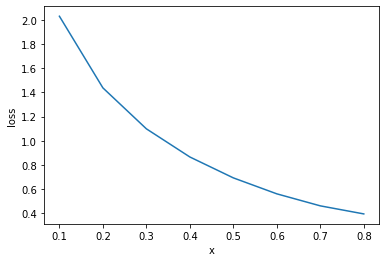

In [0]:
y_train=0.876
x=[i*0.1 for i in range(1,9)]
y=[loss(y_train,yp) for yp in x]
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('loss')
plt.show()

The cost function is the average of the loss over all training samples:

$$\mathcal J = \frac{1}{m} \sum_{i=0}^{m} \mathcal L(y, \hat y)$$